# Assignment: Diagnostic Analysis using Python

### Import and review data sets

In [1]:
import pandas as pd
import numpy as np

ad = pd.read_csv("actual_duration.csv")
ar = pd.read_csv("appointments_regional.csv")
nc = pd.read_excel("national_categories.xlsx")

In [2]:
ad.info()
ad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [3]:
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


#### No null entries found
#### "appointment_date" is stored as string. May need to convertto datetime or numeric values for further analysis:

In [4]:
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%b-%y')
ad.dtypes

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object

In [5]:
ar.info()
ar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [6]:
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


#### No null entries found
#### "time_between_book_and_appointment" is logged as text, which can be difficult to analyse

In [7]:
nc.info()
nc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


##### No null entries found

In [8]:
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


#### First, to determine the date range of data to use:

In [9]:
# Date range of data set "actual_duration"
date_min = min(ad['appointment_date'])
date_max = max(ad['appointment_date'])
print("Appointments were scheduled between ", date_min, "and ", date_max)

Appointments were scheduled between  2021-12-01 00:00:00 and  2022-06-30 00:00:00


In [10]:
# Date range of data set "national_categories"
date_min = min(nc['appointment_date'])
date_max = max(nc['appointment_date'])
print("Appointments were scheduled between ", date_min, "and ", date_max)

Appointments were scheduled between  2021-08-01 00:00:00 and  2022-06-30 00:00:00


#### Understanding geographic distribution by finding how many locations there are in the data set.

In [11]:
nc_loc = nc['sub_icb_location_name'].value_counts()
print("Count of locations: ",len(nc_loc))
print(nc_loc[[0,1,2,3,4]])

Count of locations:  106
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64


#### Using same method to understand the numbers of ervice settings, context types, national categories, and appointment statuses

In [12]:
print("Count of Service Settings: ", len(nc['service_setting'].value_counts()))

Count of Service Settings:  5


In [13]:
print("Count of Context Type: ", len(nc['context_type'].value_counts()))

Count of Context Type:  3


In [14]:
print("Count of National Categories: ", len(nc['national_category'].value_counts()))

Count of National Categories:  18


In [15]:
print("Appointment Statuses: ", len(ar['appointment_status'].value_counts()))

Appointment Statuses:  3


#### Since there are 106 locations in the data set, it may be hard to look for any useful insight at this stage as the result is expected to be highly related to the size of the region. To start with, I would prefer focusing on Service Settings and Appointment Statuses. 

In [16]:
# subsetting "national_categories" data set to reduce data columns
ss = pd.read_excel('national_categories.xlsx', usecols=['service_setting', 
                                                        'sub_icb_location_name', 
                                                        'appointment_date'])
ss.head()

,appointment_date,sub_icb_location_name,service_setting
0,2021-08-02,NHS North East and North Cumbria ICB - 00L,Primary Care Network
1,2021-08-02,NHS North East and North Cumbria ICB - 00L,Other
2,2021-08-02,NHS North East and North Cumbria ICB - 00L,General Practice
3,2021-08-02,NHS North East and North Cumbria ICB - 00L,General Practice
4,2021-08-02,NHS North East and North Cumbria ICB - 00L,General Practice


In [17]:
# Filter NHS North West London ICB - W2U3Z and date from 1 Jan to 1 Jun 2022
ss_nwl = ss[(ss['sub_icb_location_name']== 'NHS North West London ICB - W2U3Z') & 
            (ss['appointment_date']>'2021-12-31') & (ss['appointment_date']<'2022-06-02')]
ss_nwl.head()

,appointment_date,sub_icb_location_name,service_setting
800289,2022-01-01,NHS North West London ICB - W2U3Z,Unmapped
800290,2022-01-01,NHS North West London ICB - W2U3Z,Primary Care Network
800291,2022-01-01,NHS North West London ICB - W2U3Z,Other
800292,2022-01-01,NHS North West London ICB - W2U3Z,General Practice
800293,2022-01-01,NHS North West London ICB - W2U3Z,Primary Care Network


In [18]:
ss_nwl['service_setting'].value_counts()

General Practice             2104
Other                        1318
Primary Care Network         1272
Extended Access Provision    1090
Unmapped                      152
Name: service_setting, dtype: int64

#### In the first half of 2022, most appointments are for General Practices.

## Appointments Trends
#### Next let's start looking for any seasonality or trends in number of appointments.

In [19]:
nc_group = nc.groupby([nc['appointment_date'].dt.year, \
                       nc['appointment_date'].dt.month])[['count_of_appointments']].sum()

nc_group.sort_values(['count_of_appointments'], ascending=False)

count_of_appointments
appointment_date appointment_date                       
2021             11                             30405070
                 10                             30303834
2022             3                              29595038
2021             9                              28522501
2022             5                              27495508
                 6                              25828078
                 1                              25635474
                 2                              25355260
2021             12                             25140776
2022             4                              23913060
2021             8                              23852171

#### October to November has the highest number of appointments made

## Visualisations for identifying seasonal trends

### Service Settings

In [20]:
nc_ss = nc.groupby(['appointment_month', 'service_setting'])[['count_of_appointments']].sum().reset_index()
nc_ss.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


/var/folders/96/28525w816xn8tlltslw4m86w0000gn/T/ipykernel_78482/2730255485.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

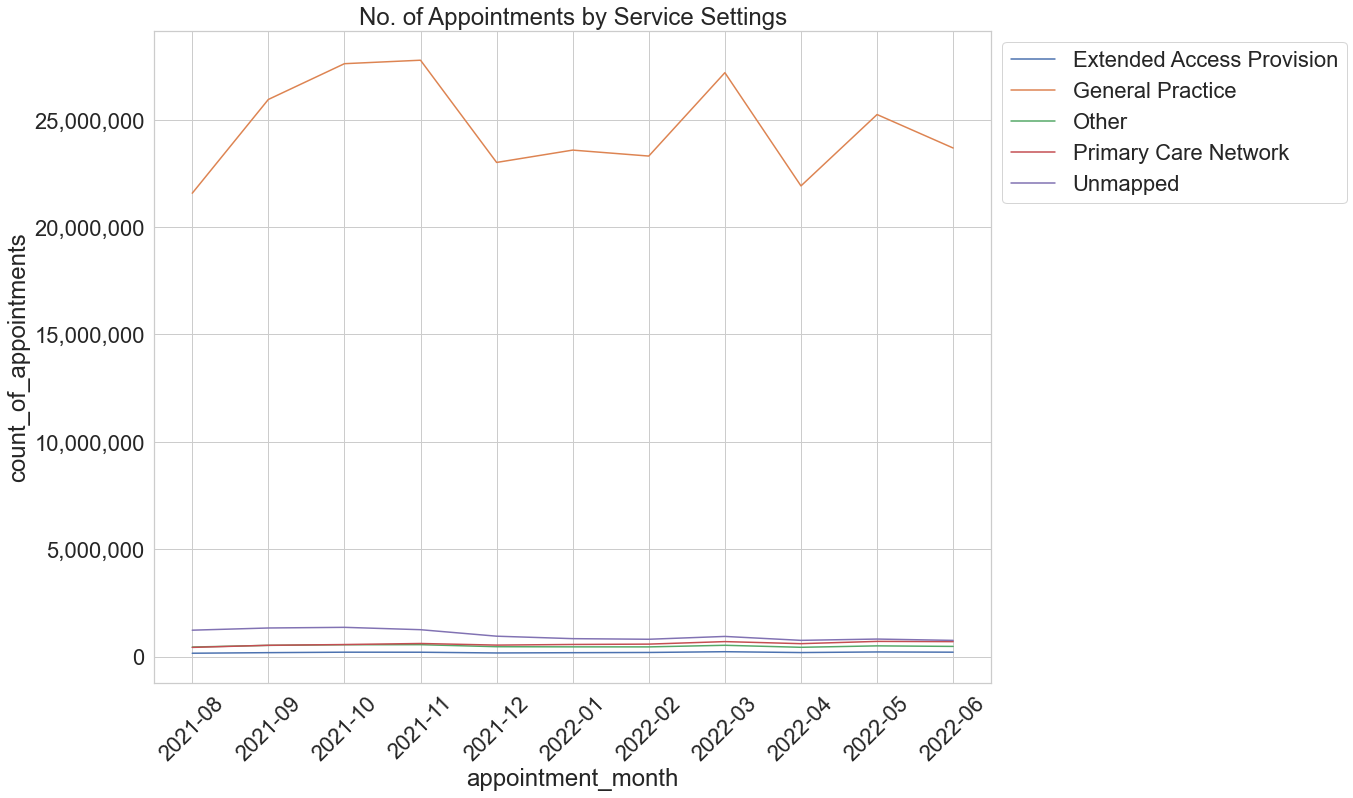

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,12))
sns.set(style="whitegrid", font_scale=2)

plot1 = sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', 
             data=nc_ss, ci=None)
plot1.set(title='No. of Appointments by Service Settings')

plt.legend(bbox_to_anchor=(1, 1), ncol=1)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xticks(rotation=45)

# plt.savefig('Service_Setting.png')

### Context Types

In [22]:
nc_ct = nc.groupby(['appointment_month', 'context_type'])\
        [['count_of_appointments']].sum().reset_index()
nc_ct.head()

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135


/var/folders/96/28525w816xn8tlltslw4m86w0000gn/T/ipykernel_78482/2372200629.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

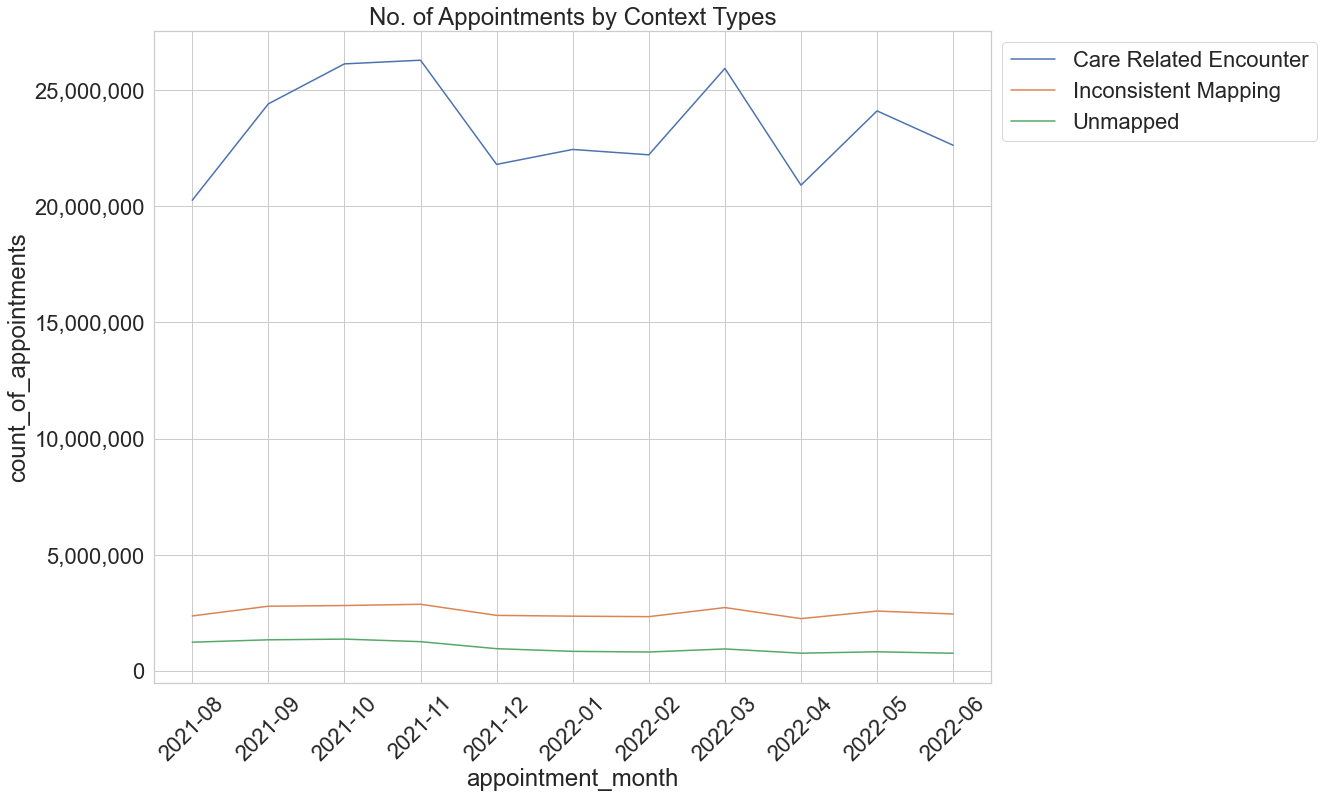

In [23]:
plt.figure(figsize=(15,12))
sns.set(style="whitegrid", font_scale=2)

sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type', 
             data=nc_ct, ci=None).set(title='No. of Appointments by Context Types')

plt.legend(bbox_to_anchor=(1, 1), ncol=1)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xticks(rotation=45)

# plt.savefig('Context_Type.png')

### National Categories

In [24]:
nc_nc = nc.groupby(['appointment_month', 'national_category'])\
        [['count_of_appointments']].sum().reset_index()
nc_nc.head()

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045


/var/folders/96/28525w816xn8tlltslw4m86w0000gn/T/ipykernel_78482/4166155443.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

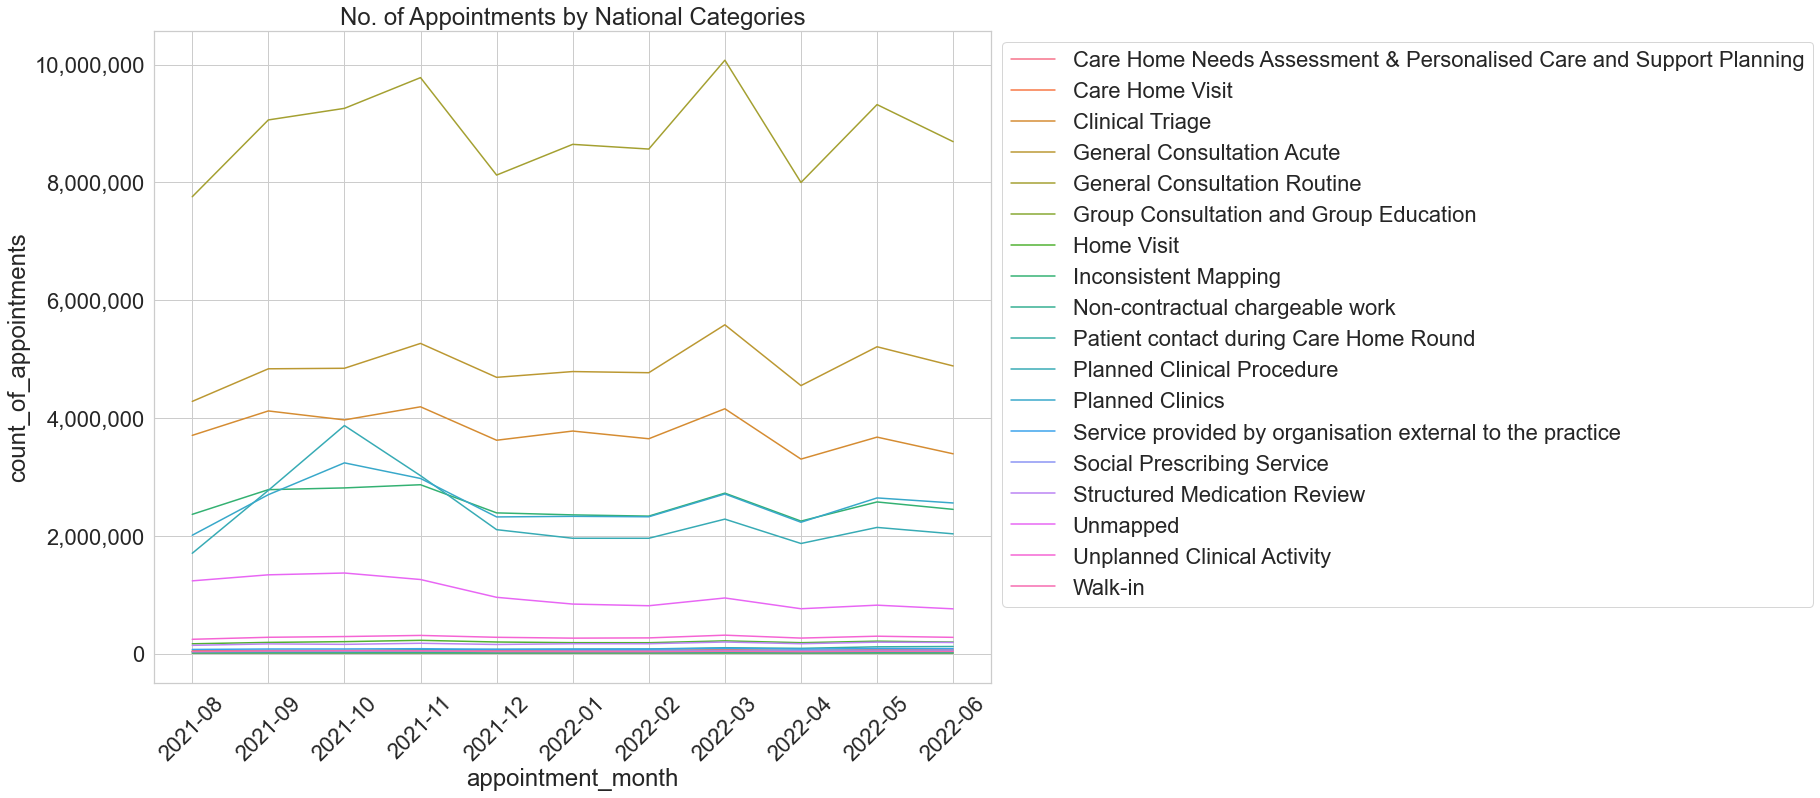

In [25]:
plt.figure(figsize=(15,12))
sns.set(style="whitegrid", font_scale=2)

sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', 
             data=nc_nc, ci=None).set(title='No. of Appointments by National Categories')

plt.legend(bbox_to_anchor=(1, 1), ncol=1)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xticks(rotation=45)

# plt.savefig('National_Cat.png')

#### Peak always seen in 2022 Mar and May, and 2021 Oct and Nov.

#### Let's further look into seasons:

In [26]:
nc_ss_day = nc.groupby([nc['appointment_date'].dt.day, \
        'appointment_month','service_setting'])[['count_of_appointments']].sum().reset_index()
nc_ss_day

,appointment_date,appointment_month,service_setting,count_of_appointments
0,1,2021-08,Extended Access Provision,438
1,1,2021-08,General Practice,3411
2,1,2021-08,Other,401
3,1,2021-08,Primary Care Network,323
4,1,2021-08,Unmapped,1054
...,...,...,...,...
1665,31,2022-05,Extended Access Provision,10165
1666,31,2022-05,General Practice,1154859
1667,31,2022-05,Other,23079
1668,31,2022-05,Primary Care Network,32851


### Summer (2021 Aug)

/var/folders/96/28525w816xn8tlltslw4m86w0000gn/T/ipykernel_78482/4078001525.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -200000.0, '-200,000'),
 Text(0, 0.0, '0'),
 Text(0, 200000.0, '200,000'),
 Text(0, 400000.0, '400,000'),
 Text(0, 600000.0, '600,000'),
 Text(0, 800000.0, '800,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1200000.0, '1,200,000')]

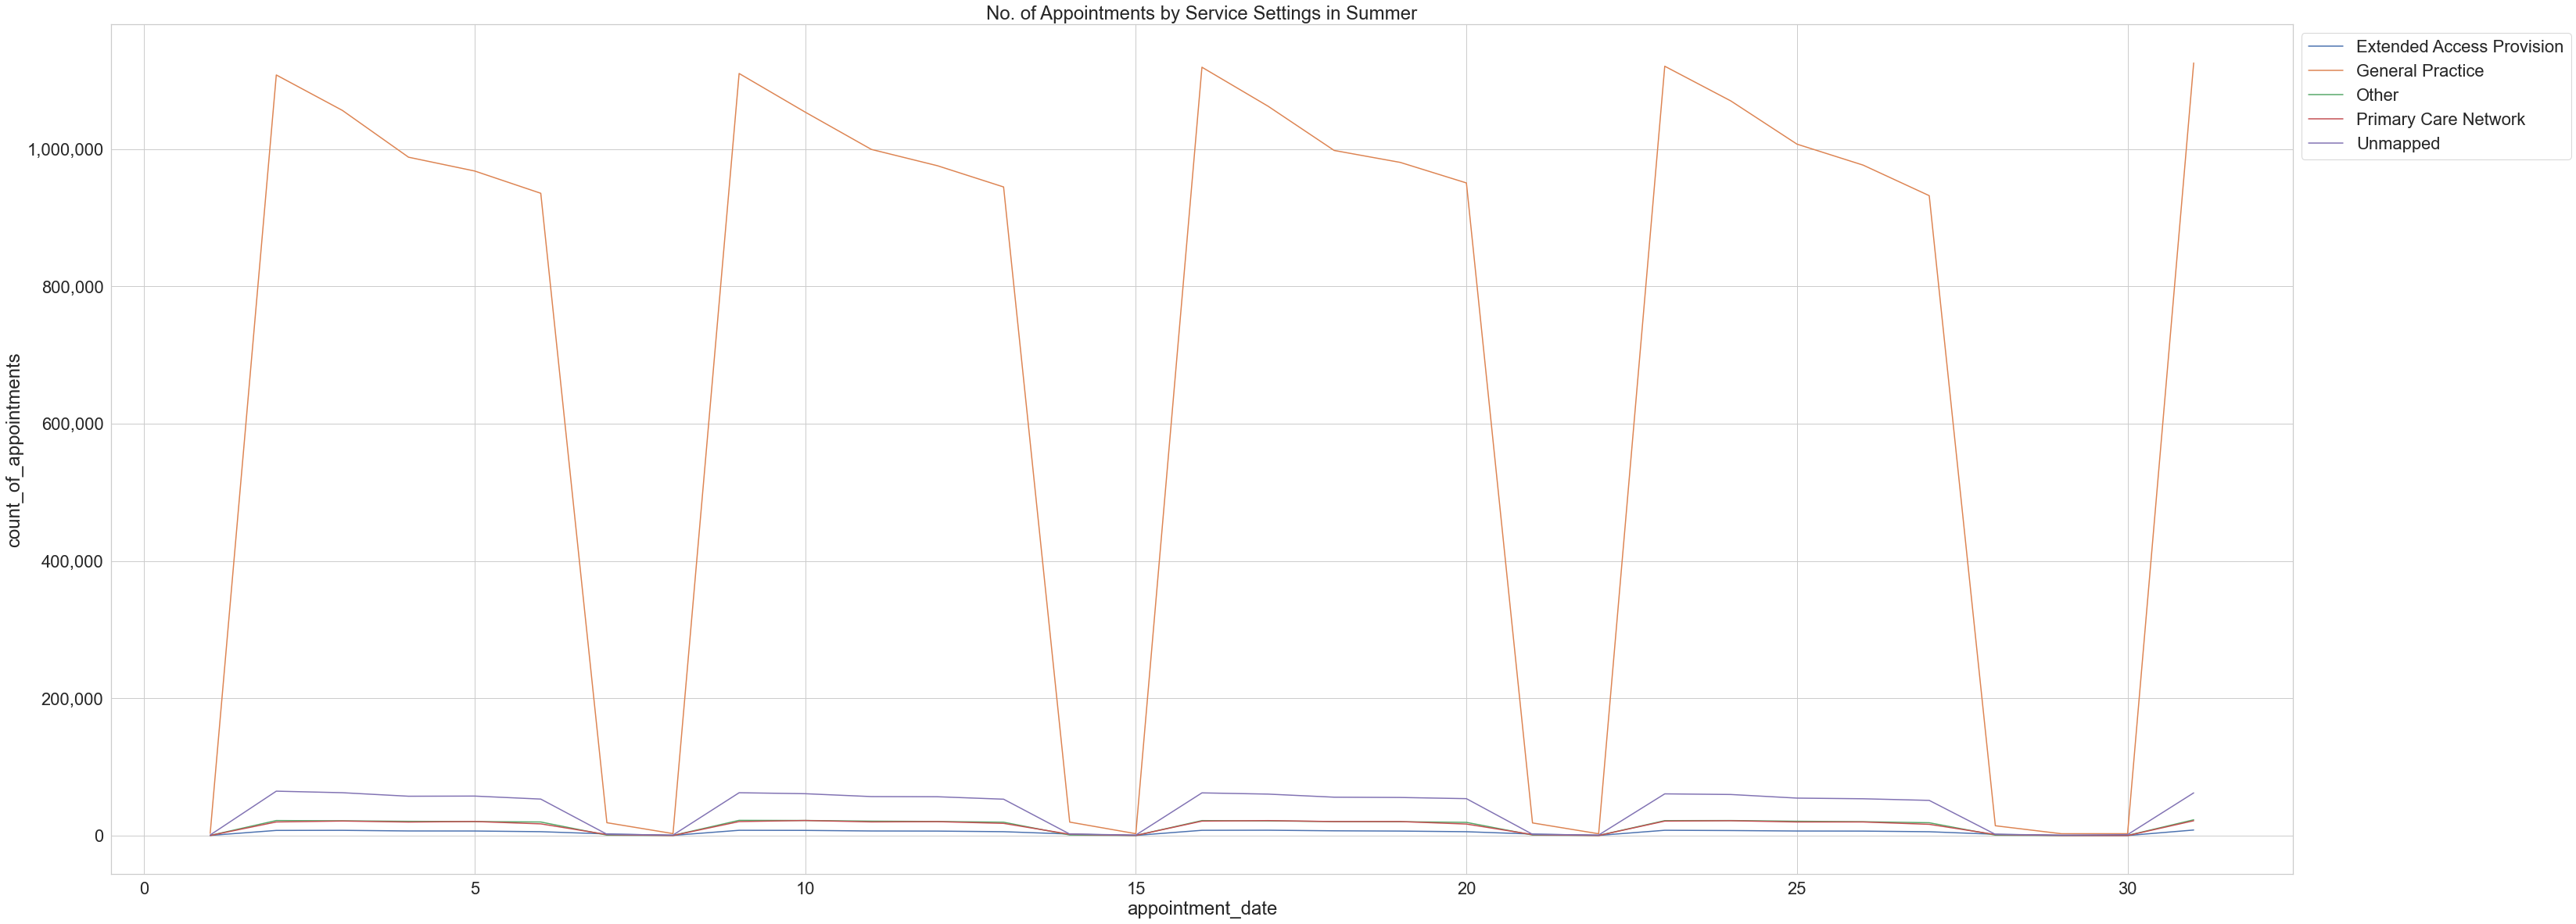

In [27]:
plt.figure(figsize=(50,20))
sns.set(style="whitegrid", font_scale=2)

sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', 
             data=nc_ss_day[nc_ss_day['appointment_month']=='2021-08'], 
             ci=None).set(title='No. of Appointments by Service Settings in Summer')

plt.legend(bbox_to_anchor=(1, 1), ncol=1)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# plt.savefig('Summer.png')

### Autum (2021 Oct)

/var/folders/96/28525w816xn8tlltslw4m86w0000gn/T/ipykernel_78482/1155171591.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -200000.0, '-200,000'),
 Text(0, 0.0, '0'),
 Text(0, 200000.0, '200,000'),
 Text(0, 400000.0, '400,000'),
 Text(0, 600000.0, '600,000'),
 Text(0, 800000.0, '800,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1200000.0, '1,200,000'),
 Text(0, 1400000.0, '1,400,000'),
 Text(0, 1600000.0, '1,600,000')]

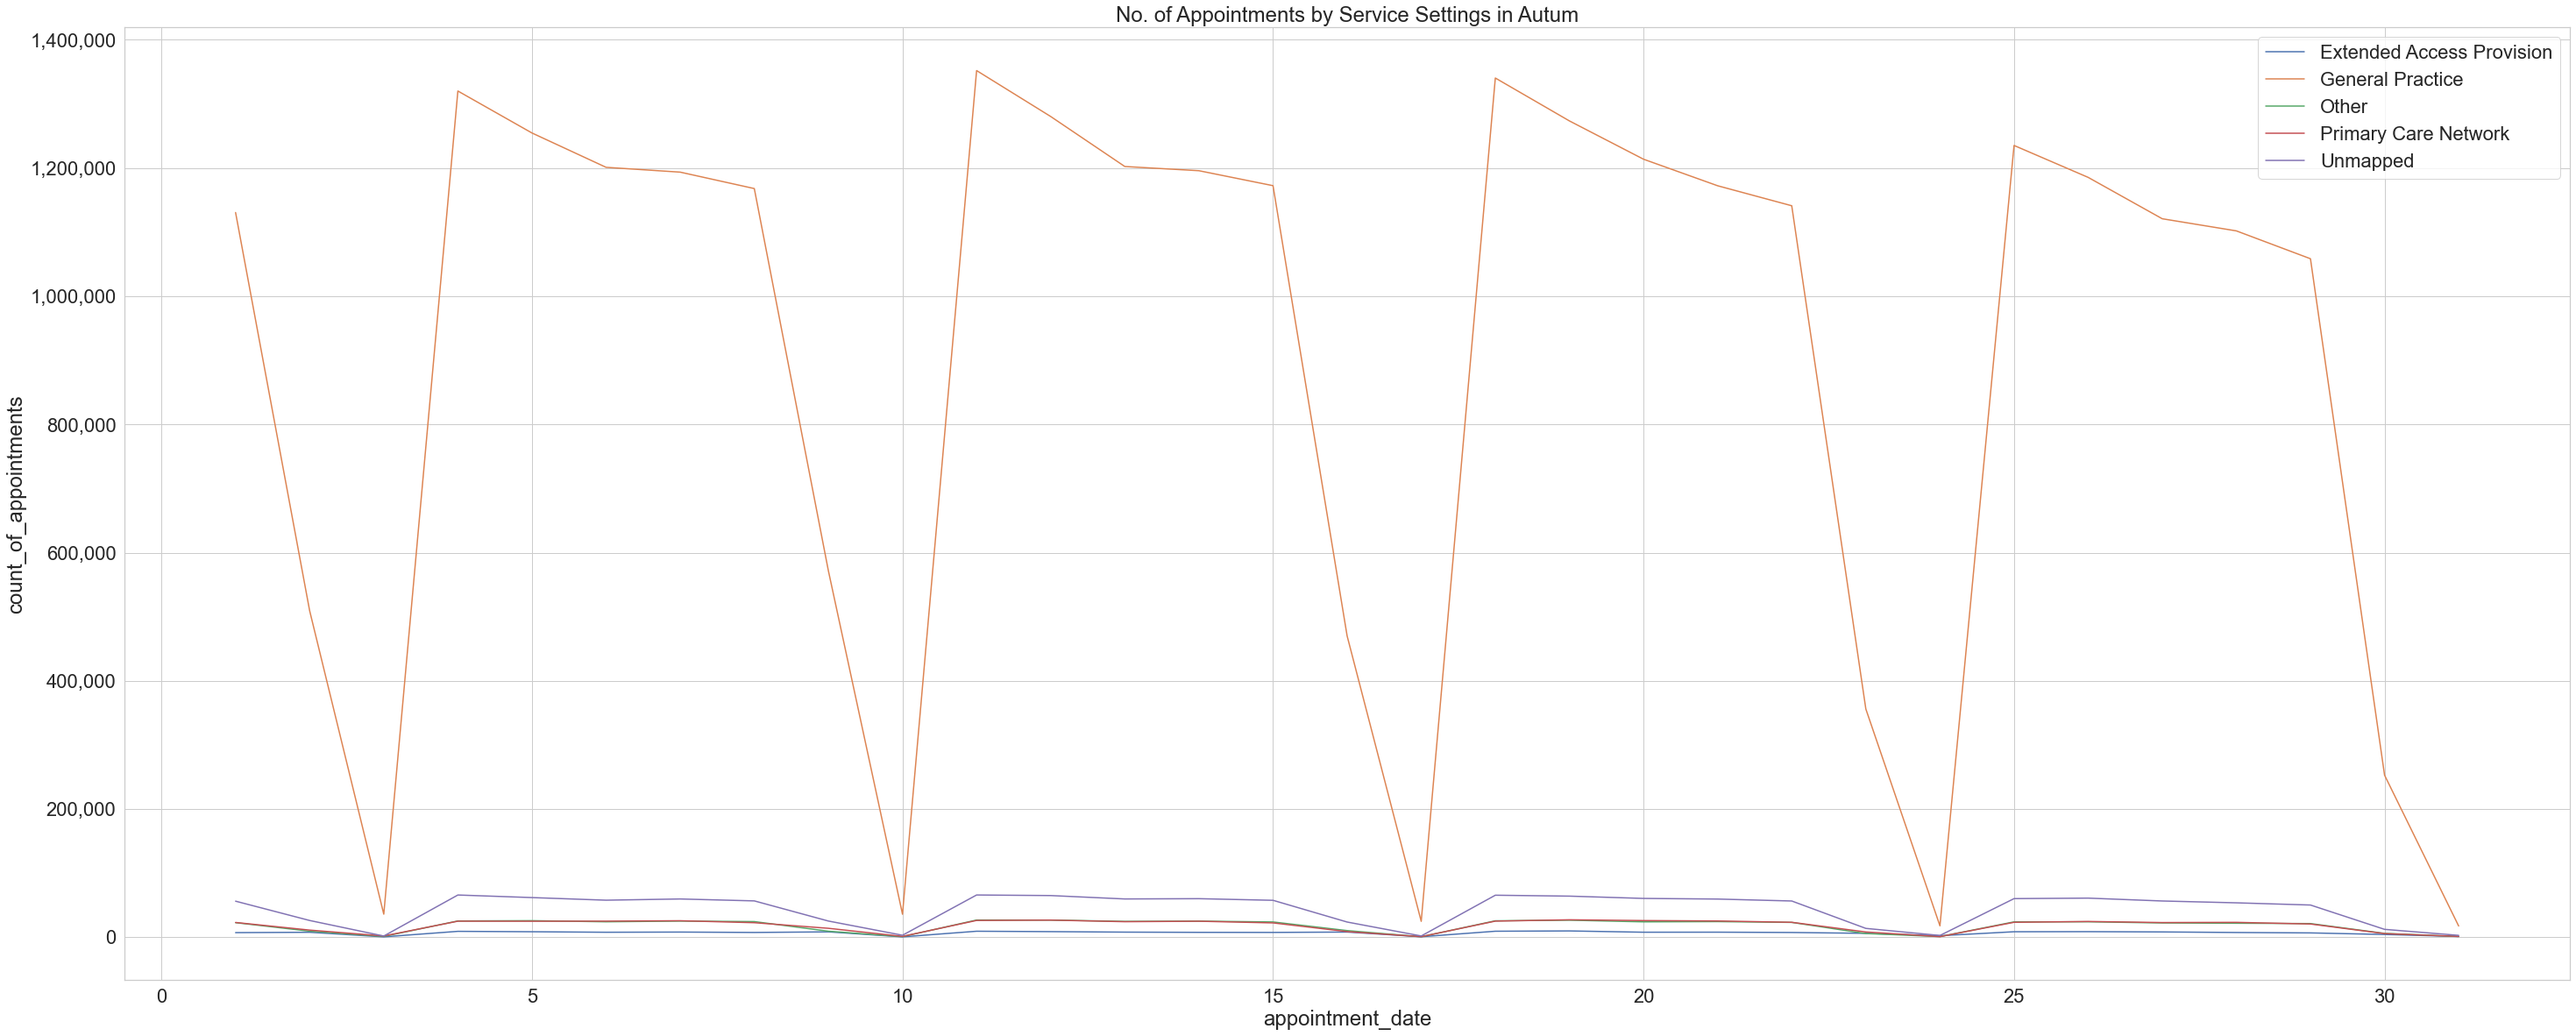

In [28]:
plt.figure(figsize=(50,20))
sns.set(style="whitegrid", font_scale=2)

sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', 
             data=nc_ss_day[nc_ss_day['appointment_month']=='2021-10'], 
             ci=None).set(title='No. of Appointments by Service Settings in Autum')

plt.legend(bbox_to_anchor=(1, 1), ncol=1)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# plt.savefig('Autum.png')


### Winter (2022 Jan)

/var/folders/96/28525w816xn8tlltslw4m86w0000gn/T/ipykernel_78482/1466963390.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -200000.0, '-200,000'),
 Text(0, 0.0, '0'),
 Text(0, 200000.0, '200,000'),
 Text(0, 400000.0, '400,000'),
 Text(0, 600000.0, '600,000'),
 Text(0, 800000.0, '800,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1200000.0, '1,200,000'),
 Text(0, 1400000.0, '1,400,000')]

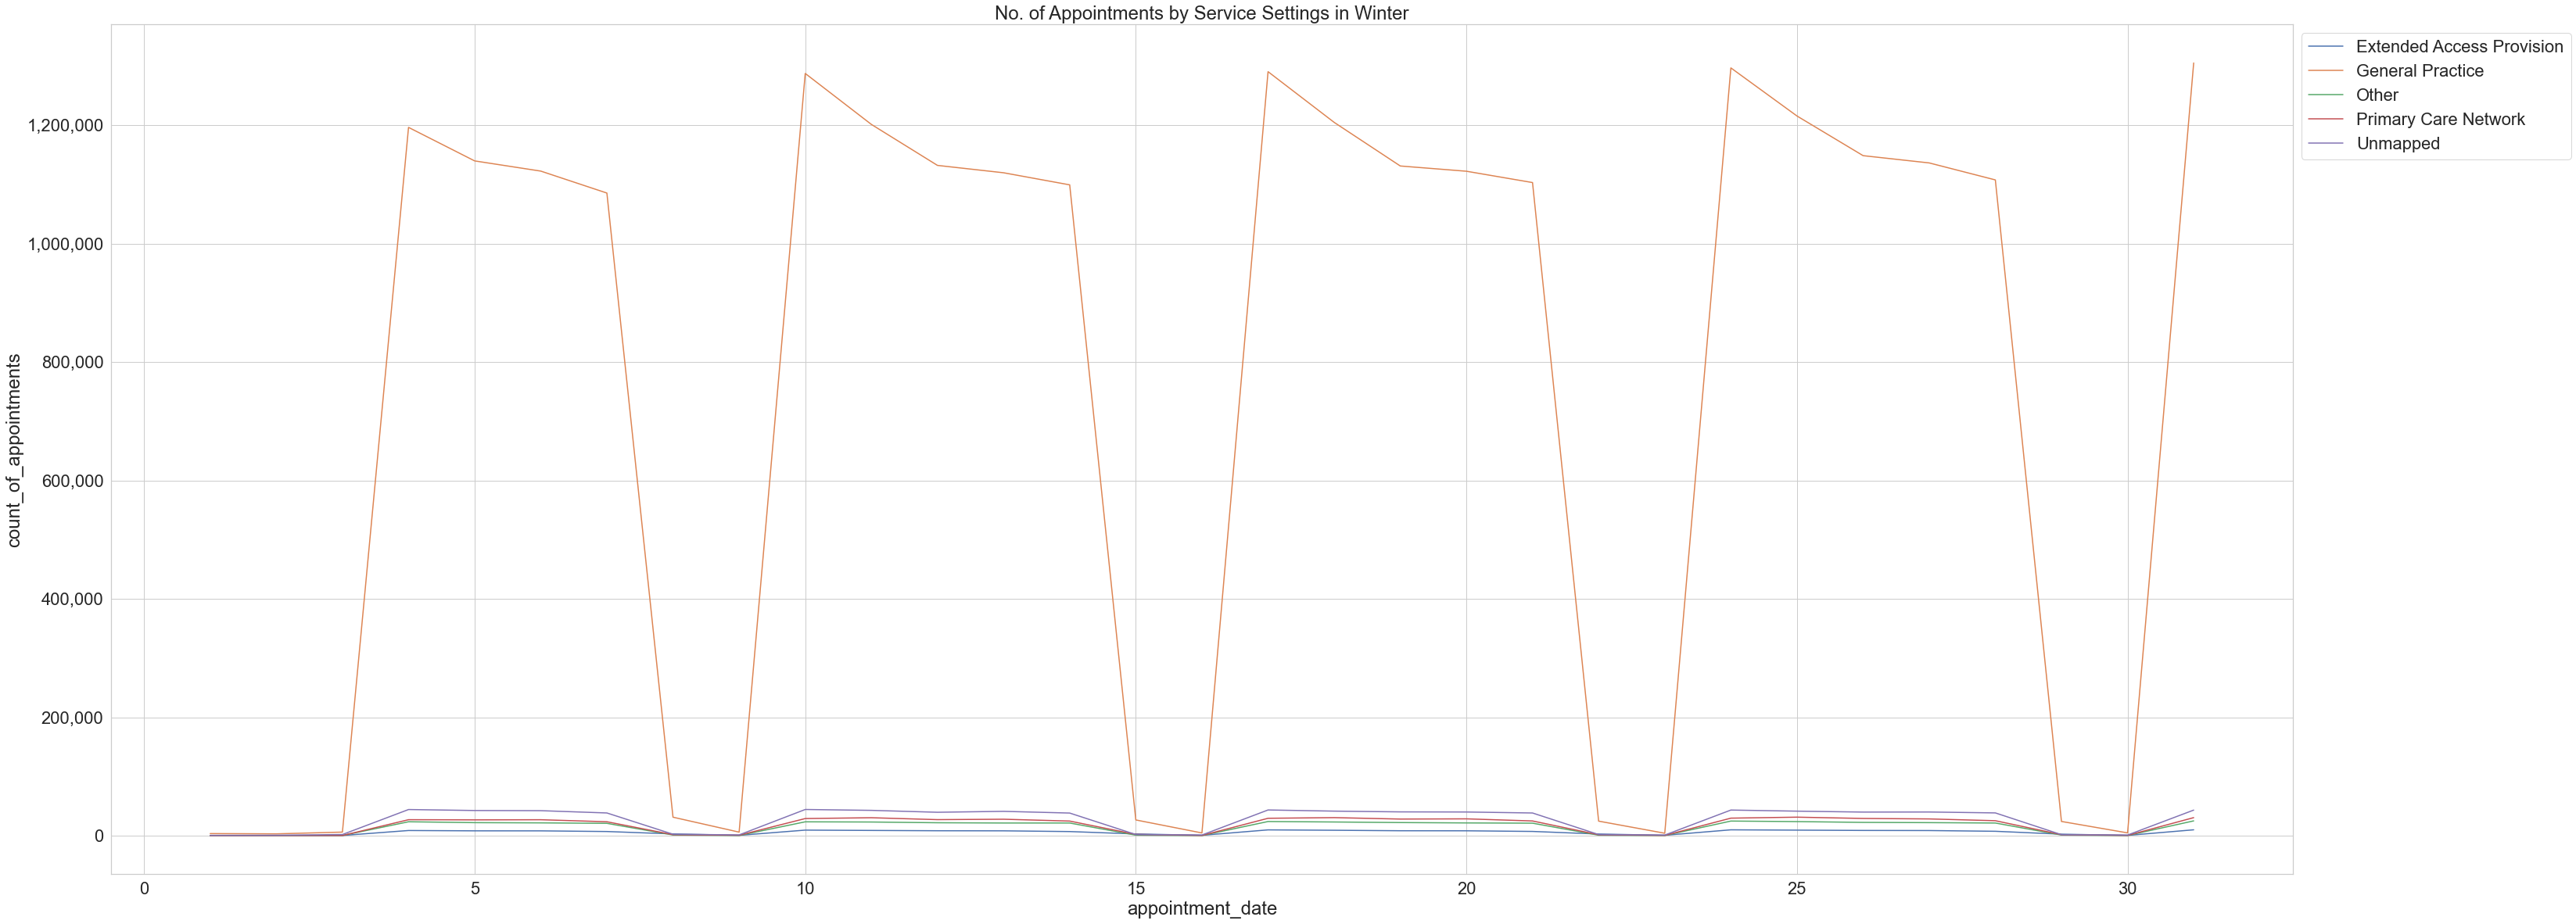

In [29]:
plt.figure(figsize=(50,20))
sns.set(style="whitegrid", font_scale=2)

sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', 
             data=nc_ss_day[nc_ss_day['appointment_month']=='2022-01'], 
             ci=None).set(title='No. of Appointments by Service Settings in Winter')

plt.legend(bbox_to_anchor=(1, 1), ncol=1)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# plt.savefig('Winter.png')

### Spring (2022 Apr)

/var/folders/96/28525w816xn8tlltslw4m86w0000gn/T/ipykernel_78482/2391566699.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -200000.0, '-200,000'),
 Text(0, 0.0, '0'),
 Text(0, 200000.0, '200,000'),
 Text(0, 400000.0, '400,000'),
 Text(0, 600000.0, '600,000'),
 Text(0, 800000.0, '800,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1200000.0, '1,200,000'),
 Text(0, 1400000.0, '1,400,000')]

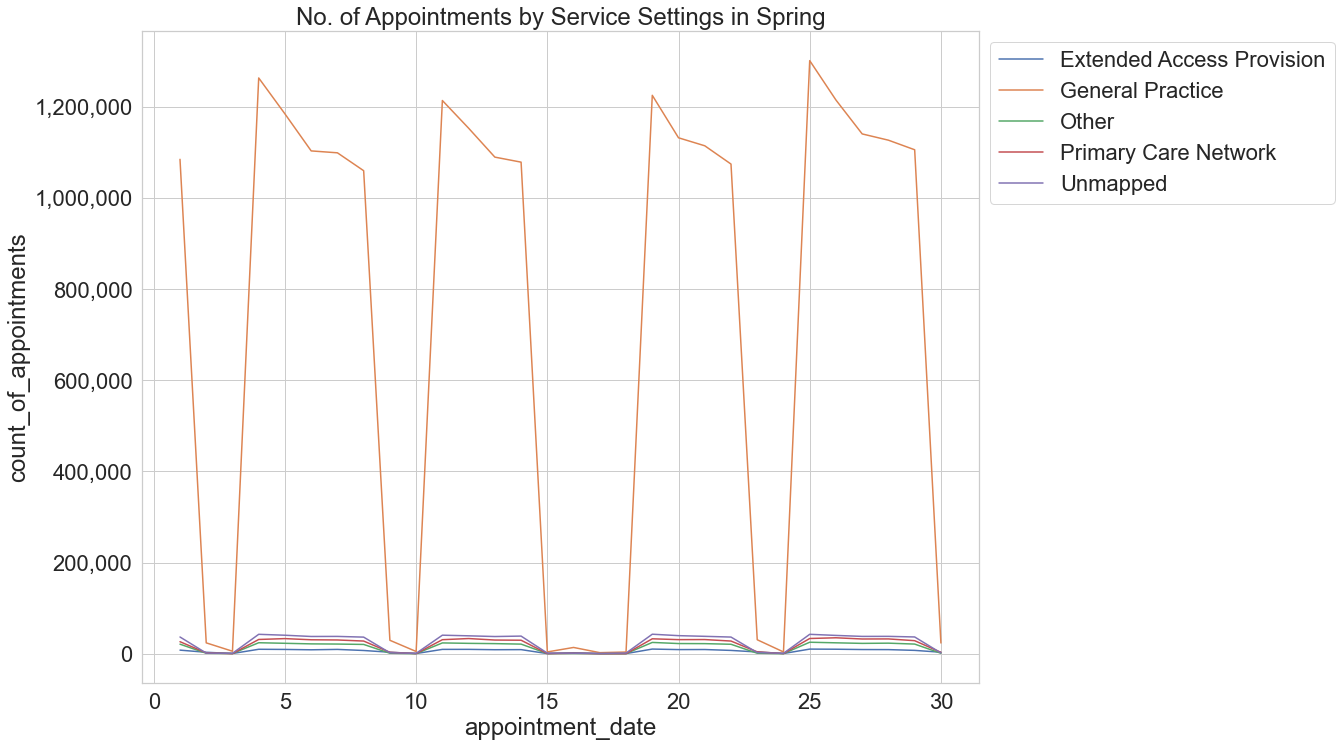

In [30]:
plt.figure(figsize=(15,12))
sns.set(style="whitegrid", font_scale=2)

sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', 
             data=nc_ss_day[nc_ss_day['appointment_month']=='2022-04'], 
             ci=None).set(title='No. of Appointments by Service Settings in Spring')
plt.legend(bbox_to_anchor=(1, 1), ncol=1)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# plt.savefig('Spring.png')

#### Obvious weekly trend found in all seasons.

### Twitter Hashtag

In [31]:
pd.options.display.max_colwidth=200
tw = pd.read_csv('tweets.csv')
tw.head(5)

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [32]:
tw.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [33]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


#### Null values found in "tweet_entities_hashtags"

In [34]:
tw['tweet_retweet_count'].value_counts()

0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64

In [35]:
tw['tweet_favorite_count'].value_counts()

0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64

In [36]:
tweets_text = tw['tweet_full_text']
print(tweets_text)

0       As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...
1                                                                   RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…
2                                                                RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3                                                                  RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4       ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a gr

In [37]:
tags = []
for y in [x.split(' ') for x in tw['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [38]:
ser = pd.Series(tags).value_counts()
ser.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

#### most healthcare related hashtag used is "#healthcare"

In [39]:
data = ser.to_frame().reset_index()
data.columns = ['word', 'count']
print(data)

               word  count
0       #healthcare    716
1           #health     80
2         #medicine     41
3               #ai     40
4              #job     38
...             ...    ...
1749      #evestudy      1
1750  #patientdata…      1
1751        #secure      1
1752           #sms      1
1753       \n#csjmu      1

[1754 rows x 2 columns]


In [40]:
# Check if count data type is integer
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1754 non-null   object
 1   count   1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB


[Text(0.5, 1.0, 'No.of hastags used')]

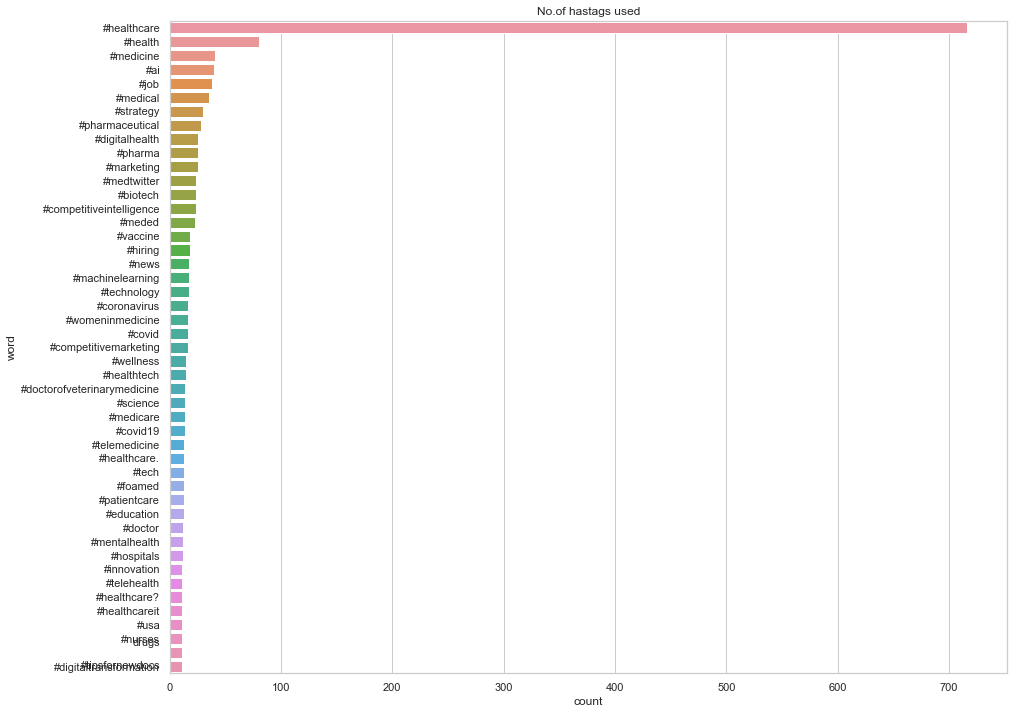

In [41]:
plt.figure(figsize=(15,12))
sns.set(style="whitegrid", font_scale=1)

sns.barplot(y='word', x='count', estimator=sum, 
            data=data[data['count']>10]).set(title='No.of hastags used')

# plt.savefig('Hashtag_All.png')

#### No. of hashtag "#healthcare is far more than other hashtags used. Although we still want to keep it in the analysis as it is highly related to our study, we will omit it in below chart in order to present other data clearly.

[Text(0.5, 1.0, 'No.of hastags used')]

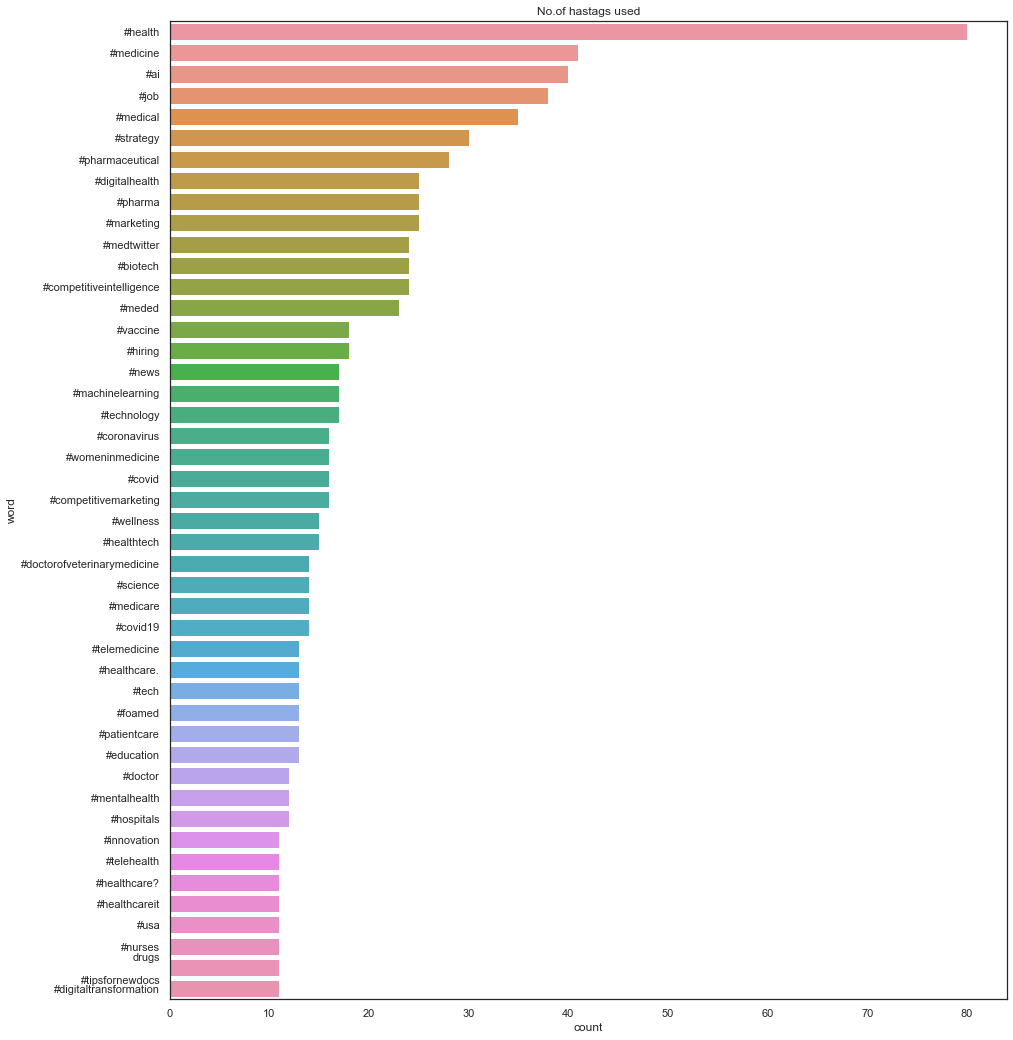

In [42]:
plt.figure(figsize=(15, 18))
sns.set_theme(style="white")

sns.barplot(y='word', x='count', estimator=sum, data=data[(data['count']>10) \
            & (data['count']<700)]).set(title='No.of hastags used')

# plt.savefig('Hashtag_Top.png')

### Utilisation Analysis

In [43]:
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [44]:
mth_min = min(ar['appointment_month'])
mth_max = max(ar['appointment_month'])
print("Appointments were scheduled between ", mth_min, "and ", mth_max)

Appointments were scheduled between  2020-01 and  2022-06


In [45]:
ar = ar[ar['appointment_month'] >= '2021-08']
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [46]:
# Check if the data is correctly subsetted
mth_min = min(ar['appointment_month'])
mth_max = max(ar['appointment_month'])
print("Appointments were scheduled between ", mth_min, "and ", mth_max)

Appointments were scheduled between  2021-08 and  2022-06


In [47]:
ar_agg = ar[['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 
             'time_between_book_and_appointment', 'count_of_appointments']].copy()
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,2021-08,GP,Attended,Face-to-Face,1 Day,6553
3653,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,2390
3654,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,10547
3655,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,937
3656,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...
596816,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [48]:
ar_df = ar_agg.groupby(['appointment_month'])[['count_of_appointments']].sum().reset_index()
ar_df

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


In [49]:
# Calculate utilisation % assuming 30 days in a month
# The NHS can accommodate a maximum of 1200000 appointments per day
ar_df['utilisation'] = (ar_df['count_of_appointments']/30).round(decimals = 1)
ar_df['utilisation %'] = (ar_df['utilisation']/1200000)

ar_df

,appointment_month,count_of_appointments,utilisation,utilisation %
0,2021-08,23852171,795072.4,0.662560
1,2021-09,28522501,950750.0,0.792292
2,2021-10,30303834,1010127.8,0.841773
3,2021-11,30405070,1013502.3,0.844585
4,2021-12,25140776,838025.9,0.698355
5,2022-01,25635474,854515.8,0.712097
6,2022-02,25355260,845175.3,0.704313
7,2022-03,29595038,986501.3,0.822084
8,2022-04,23913060,797102.0,0.664252
9,2022-05,27495508,916516.9,0.763764


In [50]:
ar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   appointment_month      11 non-null     object 
 1   count_of_appointments  11 non-null     int64  
 2   utilisation            11 non-null     float64
 3   utilisation %          11 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 480.0+ bytes


/var/folders/96/28525w816xn8tlltslw4m86w0000gn/T/ipykernel_78482/682105779.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in current_values])


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

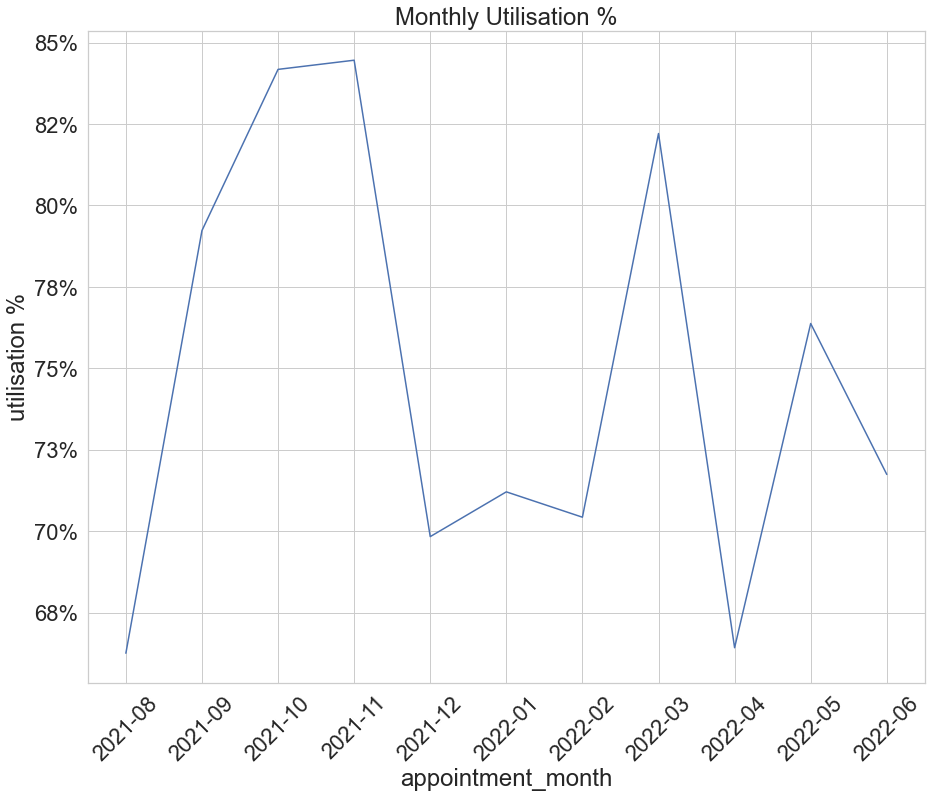

In [51]:
plt.figure(figsize=(15,12))
sns.set(style="whitegrid", font_scale=2)

sns.lineplot(x='appointment_month', y='utilisation %', data=ar_df, 
             ci=None).set_title('Monthly Utilisation %')
current_values = plt.gca().get_yticks()

plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in current_values])
plt.xticks(rotation=45)

# plt.savefig('Monthly Utilisation.png')